In [49]:
!pwd

/Users/macbook/divtel


In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive, FloatSlider, interact, fixed
from divtel import *
import copy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky
from astroplan import FixedTarget
#from . import utils
#from .const import COLORS
#from . import pointing

from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

import healpy as hp
import tqdm

#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## LOAD CTA CONFIG

In [2]:
cta = CTA_Info('south')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2025-01-14T09:40:15.372


In [3]:
# Note that if the radius is in meters, 
# you can set LoadConfig(file, radius="meters")
# defalut is in degrees

array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)


## Check configuration table

In [4]:
array.table.units = "deg"
array.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


In [5]:
table=array.table

## Check the telescope spatial distribution
This is useful to pick the groups

In [6]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


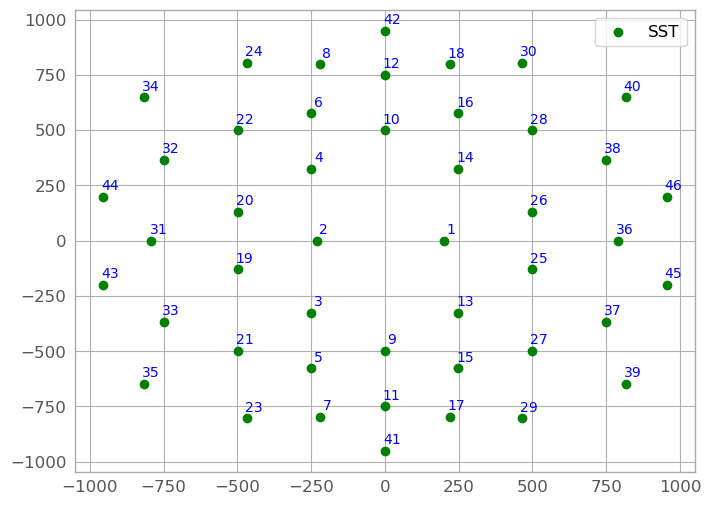

In [7]:
# Loop through all the telescopes
#for fov in array.table["fov"]:
#    print(fov)
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
for i in range(len(array.table)):
    plt.scatter(array.table['x'][i], array.table['y'][i], c=colors[i], label=fov_labels[colors[i]])

    # Annotate each point with the telescope ID
    #matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
#Annotate the point xy with text text.
#In the simplest form, the text is placed at xy.
    plt.annotate(str(array.table["id"][i]),
                 (array.table['x'][i], array.table['y'][i]),  # Point position
                 textcoords="offset points",  # Text position relative to the point
                 xytext=(5, 5),  # Offset in pixels (to avoid overlapping the point)
                 ha='center', fontsize=10, color='blue')
handles, labels = plt.gca().get_legend_handles_labels()
#handles, labels like this is doing
    #plt.gca() gets the current Axes object, which is where your plot is
    #.get_legend_handles_labels()
        #handles: Returns a list of the graphical elements (e.g., lines, scatter plot points) that would appear in the legend.
        # labels: Returns the text labels associated with each graphical element in handles

by_label = dict(zip(labels, handles))  # Remove duplicate labels, the dictionary by the structure takes out the double 
plt.legend(by_label.values(), by_label.keys())
#by_label.values This is pulling out the unique graphical elements
# by_label.keys  This is retrieving the unique text 
plt.savefig("./different_telescopes.png", dpi=300, bbox_inches="tight")
plt.show() 

## Check the hyper field of view (hFoV)

This is the whole telescope array hFoV maybe? (ask)

In [8]:
array.hFoV(m_cut=3) 

46it [00:06,  6.68it/s]


(62.238869377690584, 46.0)

In [9]:
#array.hFoV(m_cut=3)

## Grouping telescopes

In [10]:

sub_groups = {'1':[44,33,20], 
             '2':[43,3,21],
              '3':[35,23,15],
              '4':[10,34,24],
              '5':[19,22,14,13],
              '6':[31,6,2],
              '7':[7,12,39],
              '8':[41,4,18],
              '9':[8,16,26],
              '10':[5,27,17],
              '11':[9,30,40],
              '12':[11,36,37],
              '13':[32,42,28],
              '14':[1,38,45],
              '15':[25,29,46]
             }
sub_groups_2 = {'1':[44,35,5], 
             '2':[43,32,24],
              '3':[34,42,3],
              '4':[10,20,28],
              '5':[19,22,14,13],
              '6':[31,6,2],
              '7':[7,12,39],
              '8':[41,4,18],
              '9':[8,16,26],
              '10':[33,15,23],
              '11':[9,30,40],
              '12':[11,36,37],
              '13':[17,21,27],
              '14':[1,38,45],
              '15':[25,29,46]
             }
sub_groups_3={}
sub_groups_4={}
sub_groups_5={}
sub_groups_6={}
##sub_groups_3={'1':[18,14,13,17],
#             '2':[7,11,15],
#             '3':[5,8,9,12],
#             '4':[16,6,10]}


In [11]:
def compute_center_of_gravity(group):
    x, y, z = group['x'], group['y'], group['z']
    cog_x = round(np.mean(x),2)
    cog_y = round(np.mean(y),2)
    cog_z = round(np.mean(z),2)
    return cog_x, cog_y, cog_z

# Function to create new telescope list with center of gravity
def create_new_group_list(tel_group):
    new_telescopes = []
    for group in tel_group.groups:
        print(tel_group.groups)
        print (group['focal'][0],round(group['radius'][0],2))
        #id_ = group["id"][0]
        cog = compute_center_of_gravity(group)
        focal, fov = group['focal'][0], round(group['radius'][0],2)  # Assuming same within a group
        new_telescopes.append([*cog, focal, fov])
    return new_telescopes


In [12]:
tel_group_2, labels_2, number_of_telescopes_subarray_2 =array.group_by(sub_groups_2)
#tel_group_3, labels_3 = group_by(array, group=only_MST)

In [13]:
tel_group, labels, number_of_telescopes_subarray_1 =array.group_by(sub_groups)

In [14]:
# Step 2: Create new telescope list with center of gravity
new_telescopes = create_new_group_list(tel_group)
new_telescopes_2 = create_new_group_list(tel_group_2)
#new_telescopes_3 = create_new_group_list(tel_group_3)
#Why are you creating an extra telescope?


<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3 

In [15]:
# Define the file path where you want to save the output
output_file_path = './SST_file_1.txt'

# Open the file in write mode
with open(output_file_path, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path}")


New telescope data has been written to ./SST_file_1.txt


In [16]:
print(list(enumerate(new_telescopes_2)))

[(0, [-673.67, -342.0, 50.42, 5.6, 4.45]), (1, [-723.0, 324.0, 24.58, 5.6, 4.45]), (2, [-355.33, 424.33, 26.42, 5.6, 4.45]), (3, [0.0, 376.0, 16.58, 5.6, 4.45]), (4, [-125.0, 92.25, 21.38, 5.6, 4.45]), (5, [-423.33, 192.33, 20.42, 5.6, 4.45]), (6, [198.67, -232.0, 40.75, 5.6, 4.45]), (7, [-9.67, 57.33, 39.25, 5.6, 4.45]), (8, [176.0, 501.33, 12.42, 5.6, 4.45]), (9, [-321.67, -582.67, 57.25, 5.6, 4.45]), (10, [427.33, 317.67, 31.92, 5.6, 4.45]), (11, [512.67, -372.0, 23.58, 5.6, 4.45]), (12, [73.33, -598.33, 48.58, 5.6, 4.45]), (13, [634.0, 56.0, 10.08, 5.6, 4.45]), (14, [640.0, -245.0, 23.92, 5.6, 4.45])]


In [17]:
# Define the file path where you want to save the output
output_file_path_2 = './SST_2.txt'

# Open the file in write mode
with open(output_file_path_2, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes_2):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path_2}")


New telescope data has been written to ./SST_2.txt


## GRAPHING MULTIPLICITY AND FOV to understand what is going on 

In [21]:
array_SST= LoadConfig('./SST_file_1.txt', frame=cta, pointing2src=True)
full_array_SST = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)
array_SST_2= LoadConfig('./SST_2.txt', frame=cta, pointing2src=True)

#array_3= LoadConfig("./subarray_3_SOUTH.txt", frame=cta, pointing2src=True)

In [22]:
array_SST.table[:5]

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,736.12
2,-567.67,-341.0,46.42,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,663.11
3,-344.67,-676.33,63.92,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,758.95
4,-427.67,650.33,12.92,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,781.36
5,-125.0,92.25,21.38,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,158.43


In [23]:
array_SST.divergent_pointing(0.01, az=0,alt=70)

15it [00:02,  7.24it/s]
15it [00:02,  7.18it/s]


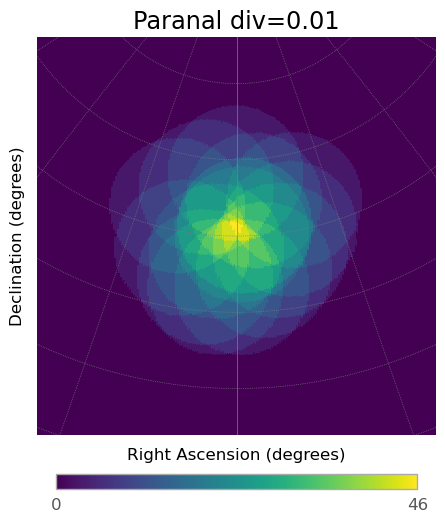

15it [00:02,  6.93it/s]
15it [00:02,  5.96it/s]


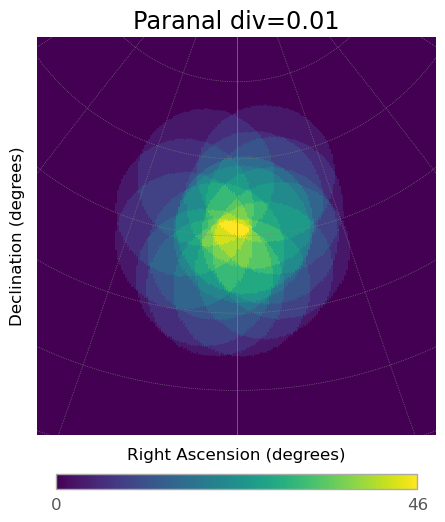

46it [00:07,  5.88it/s]
46it [00:07,  5.89it/s]


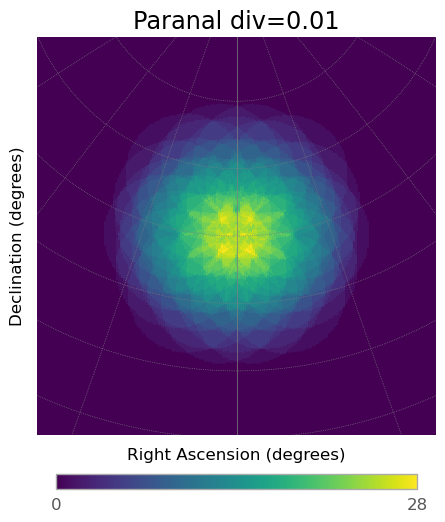

In [24]:
array_SST.divergent_pointing(0.01, az=0,alt=70)
array_SST_2.divergent_pointing(0.01, az=0,alt=70)
full_array_SST.divergent_pointing(0.01, az=0,alt=70)
array_SST.multiplicity_plot(number_of_telescopes_subarray_1)
array_SST_2.multiplicity_plot(number_of_telescopes_subarray_2)

full_array_SST.multiplicity_plot()

In [23]:
div=[]

div=np.linspace(0,0.02, 8)


In [24]:
FoV_full_array=[]
multiplicity_full_array=[]
for divergence in div:
    full_array_SST.divergent_pointing(divergence, az=0,alt=70)
    FoV=full_array_SST.hFoV(m_cut=3)[0]
    multiplicity=full_array_SST.hFoV(m_cut=3)[1]
    FoV_full_array.append(FoV)
    multiplicity_full_array.append(multiplicity)
  

46it [00:07,  6.02it/s]
46it [00:07,  5.94it/s]
46it [00:07,  5.94it/s]
46it [00:10,  4.26it/s]
46it [00:07,  5.88it/s]
46it [00:07,  5.98it/s]
46it [00:07,  5.93it/s]
46it [00:07,  5.96it/s]
46it [00:07,  5.97it/s]
46it [00:07,  5.89it/s]
46it [00:07,  5.97it/s]
46it [00:07,  5.93it/s]
46it [00:07,  6.01it/s]
46it [00:07,  6.01it/s]
46it [00:07,  5.91it/s]
46it [00:07,  5.97it/s]


In [25]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


In [26]:
FoV_array=[]
multiplicity_array=[]

for divergence in div:
    array_SST.divergent_pointing(divergence, az=0,alt=70)
    FoV=array_SST.hFoV(subarray_mult=number_of_telescopes_subarray_1)[0]
    multiplicity=array_SST.hFoV(subarray_mult=number_of_telescopes_subarray_1)[1]
    FoV_array.append(FoV)
    multiplicity_array.append(multiplicity)
   

15it [00:02,  6.02it/s]
15it [00:02,  5.90it/s]
15it [00:02,  6.03it/s]
15it [00:02,  5.88it/s]
15it [00:02,  6.03it/s]
15it [00:02,  5.79it/s]
15it [00:02,  6.04it/s]
15it [00:02,  6.01it/s]
15it [00:02,  5.46it/s]
15it [00:02,  6.05it/s]
15it [00:02,  5.91it/s]
15it [00:02,  6.01it/s]
15it [00:02,  5.83it/s]
15it [00:02,  6.03it/s]
15it [00:02,  5.97it/s]
15it [00:02,  6.04it/s]


In [27]:
FoV_array_2=[]
multiplicity_array_2=[]
for divergence in div:
    array_SST_2.divergent_pointing(divergence, az=0,alt=70)
    FoV=array_SST_2.hFoV(subarray_mult=number_of_telescopes_subarray_2)[0]
    multiplicity=array_SST_2.hFoV(subarray_mult=number_of_telescopes_subarray_2)[1]
    FoV_array_2.append(FoV)
    multiplicity_array_2.append(multiplicity)
     

15it [00:02,  6.03it/s]
15it [00:02,  6.03it/s]
15it [00:02,  5.90it/s]
15it [00:02,  6.06it/s]
15it [00:02,  5.88it/s]
15it [00:02,  5.82it/s]
15it [00:02,  5.98it/s]
15it [00:02,  6.05it/s]
15it [00:02,  5.97it/s]
15it [00:02,  5.96it/s]
15it [00:02,  5.89it/s]
15it [00:02,  5.97it/s]
15it [00:02,  6.05it/s]
15it [00:02,  6.03it/s]
15it [00:02,  5.99it/s]
15it [00:02,  6.08it/s]


In [28]:
print(len(div), len(FoV_full_array), len(FoV_array))

8 8 8


In [29]:
## First to start understanding what is going on I wanted to graph in the 4 plots together 

In [30]:
FoV_array

[62.21264145127774,
 95.14180306260961,
 134.41812286585093,
 179.6088400751897,
 230.63527091138735,
 287.31381988955394,
 349.1068145182261,
 415.4765823059404]

## PENSAR COMO AUTOMIZAR LO SIGUIENTE EL FOV CHE STUDIO TIENE QUE SER SI O SI DEL FULL ARRAY CON EL MINIMO DEL ARRAY DE TELESCOPIOS QUE TENGO PRARA PODER CONFRONTAR MEJOR. En cambio no poner ningun limite para los subarrays

In [31]:
number_of_telescopes_subarray_1

[3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

# hFoV and multiplicities graphs 

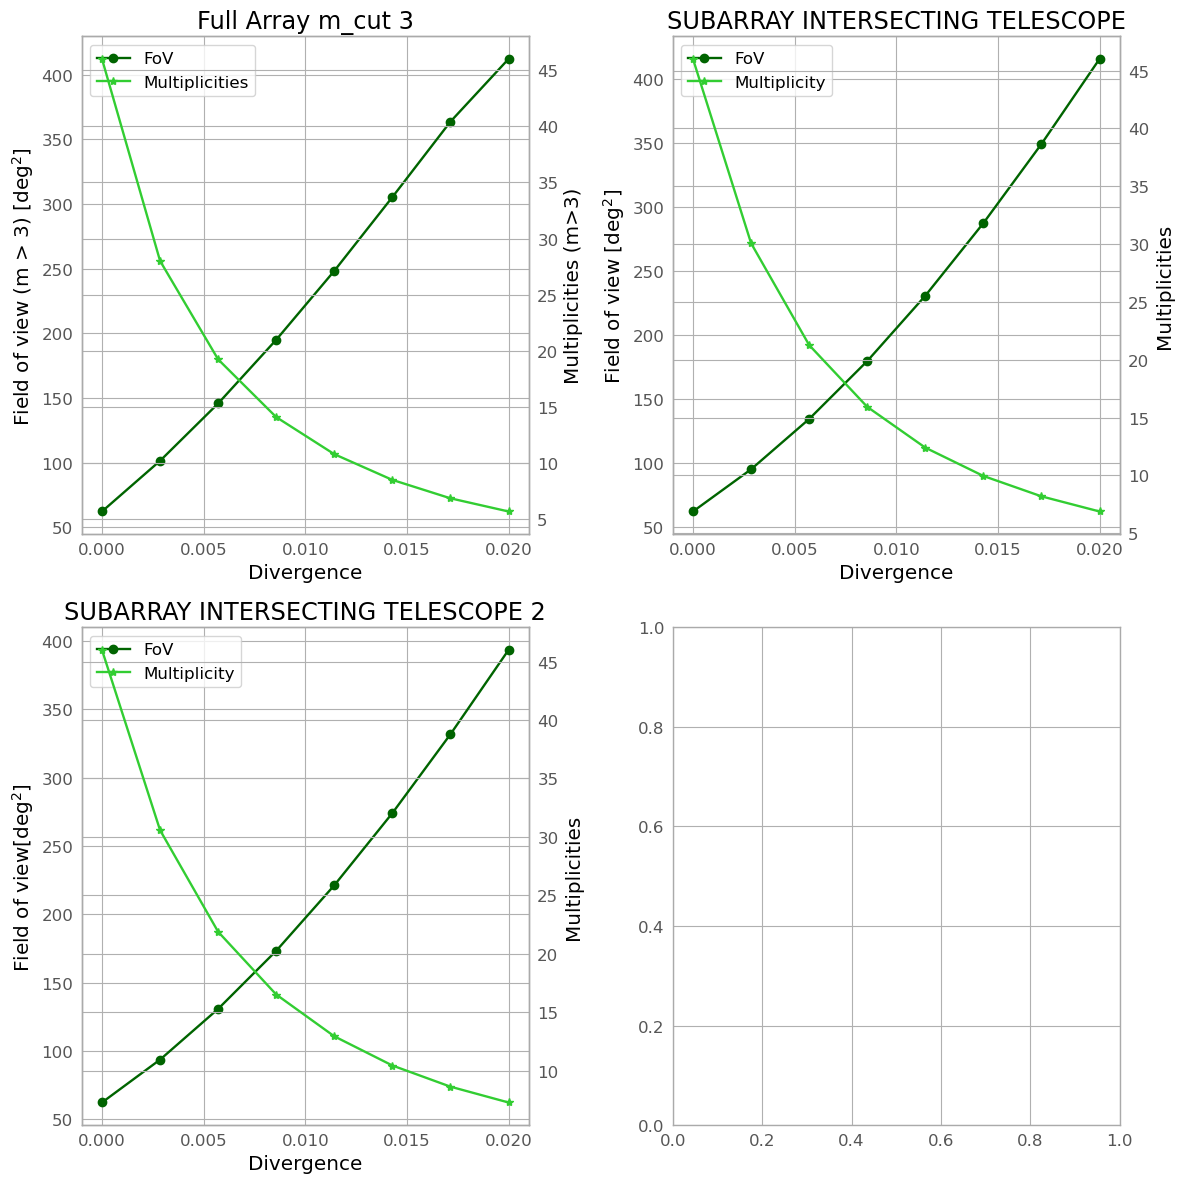

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12)) 
# Plot Full Array
# Full Array with m_cut = 3
l1=axes[0,0].plot(div, FoV_full_array, label='FoV', marker='o', color='darkgreen')
ax2 = axes[0,0].twinx()
l2=ax2.plot(div, multiplicity_full_array, label='Multiplicities',marker='*', color='limegreen')
axes[0,0].set_title('Full Array m_cut 3')
axes[0,0].set_xlabel('Divergence')
axes[0,0].set_ylabel('Field of view (m > 3) [deg$^2$]')
ax2.set_ylabel('Multiplicities (m>3)')
axeslegend = l1+l2
axes[0,0].legend(axeslegend, [l.get_label() for l in axeslegend])



#Plot the ones for subarray 1
l1=axes[0,1].plot(div, FoV_array, label='FoV',marker='o', color='darkgreen')
ax5=axes[0,1].twinx()
l2=ax5.plot(div, multiplicity_array, label='Multiplicity', marker='*', color='limegreen')
axes[0,1].set_title('SUBARRAY INTERSECTING TELESCOPE')
axes[0,1].set_xlabel('Divergence')
axes[0,1].set_ylabel('Field of view [deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[0,1].legend(axeslegend, [l.get_label() for l in axeslegend])

#Plot the ones for subarray 2
l1=axes[1,0].plot(div, FoV_array_2, label='FoV',marker='o', color='darkgreen')
ax5=axes[1,0].twinx()
l2=ax5.plot(div, multiplicity_array_2, label='Multiplicity', marker='*', color='limegreen')
axes[1,0].set_title('SUBARRAY INTERSECTING TELESCOPE 2')
axes[1,0].set_xlabel('Divergence')
axes[1,0].set_ylabel('Field of view[deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[1,0].legend(axeslegend, [l.get_label() for l in axeslegend])


# Adjust layout
plt.tight_layout()



plt.show()

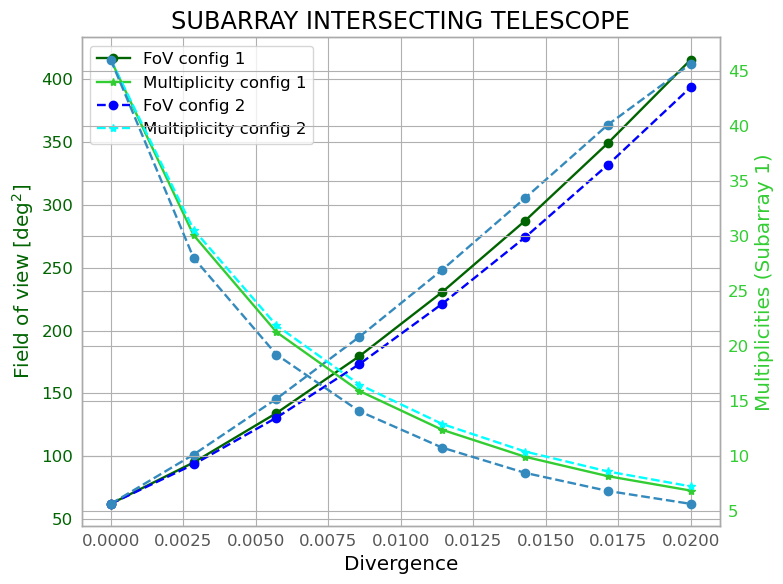

In [33]:
# Plot for subarray 1 on the primary y-axis
fig, ax1 = plt.subplots()
l1, = ax1.plot(div, FoV_array, label='FoV config 1', marker='o', color='darkgreen')
ax1.set_ylabel('Field of view [deg$^2$]', color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')

# Add secondary y-axis for multiplicity (subarray 1)
ax2 = ax1.twinx()
l2, = ax2.plot(div, multiplicity_array, label='Multiplicity config 1', marker='*', color='limegreen')

ax2.set_ylabel('Multiplicities (Subarray 1)', color='limegreen')
ax2.tick_params(axis='y', labelcolor='limegreen')

# Plot for subarray 2 on the same axes
l3, = ax1.plot(div, FoV_array_2, label='FoV config 2', marker='o', linestyle='--', color='blue')
l4, = ax2.plot(div, multiplicity_array_2, label='Multiplicity config 2', marker='*', linestyle='--', color='cyan')
#Plot the complete FoV

l5, = ax1.plot(div, FoV_full_array, label='FoV no subarrays', marker='o', linestyle='--')
l6, = ax2.plot(div, multiplicity_full_array, label='multiplicity no subarrays', marker='o', linestyle='--')
# Title and labels
ax1.set_title('SUBARRAY INTERSECTING TELESCOPE')
ax1.set_xlabel('Divergence')

# Combine legends from both y-axes
lines = [l1, l2, l3, l4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Adjust layout for better readability
fig.tight_layout()

# Show plot
plt.show()

In [34]:
 FoV_full_array

[62.21264145127774,
 101.41027747528051,
 145.7617010394081,
 195.00463287953204,
 248.29977935044113,
 305.3455192983876,
 363.70265556697655,
 412.17186357792144]

In [35]:
multiplicity_full_array = np.array(multiplicity_full_array)

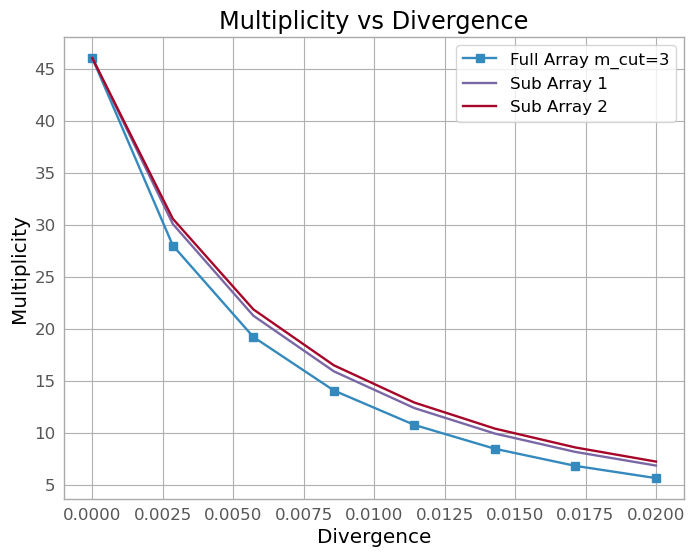

In [36]:
plt.plot(div, multiplicity_full_array, label='Full Array m_cut=3', marker='s')

plt.plot(div,  multiplicity_array, label='Sub Array 1')
plt.plot(div,  multiplicity_array_2, label='Sub Array 2')
#plt.plot(div[:10],  multiplicity_full_array_mult_cut_2[:10], label='Full Array m_cut=2', marker='s')
plt.xlabel("Divergence")  
plt.ylabel("Multiplicity")  # Y-axis label
plt.title("Multiplicity vs Divergence")  # Title of the plot
plt.legend()
plt.show()

## MULTIPLE DIVERGENCES

First trial will be using the LST 4 and seeing what happens

In [62]:
array_LST= LoadConfig('./LST_south.txt', frame=cta, pointing2src=True)

In [63]:
table_LST_new = []
table_LST= array_LST.table
# Append the columns for LST so I know what to get or expect
table_LST_new.append(table_LST['x'])
table_LST_new.append(table_LST['y'])
table_LST_new.append(table_LST['z'])
table_LST_new.append(table_LST['focal'])
table_LST_new.append(table_LST['radius'])
table_LST_new.append(table_LST['fov'])

# Initialize sub_config and other variables
sub_config = []
telescopes = [2, 4]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config.append([col[tel - 1] for col in table_LST_new])


# Print the result for verification
print(sub_config)

[[80.0, 0.0, 29.0, 28.0, 1.0511816435523123, 0.004427813771437404], [-120.0, 0.0, 33.0, 28.0, 1.0511816435523123, 0.004427813771437404]]


In [64]:
table_LST_new_2 = []
table_LST= array_LST.table
# Append the columns for LST so I know what to get or expect
table_LST_new_2.append(table_LST['x'])
table_LST_new_2.append(table_LST['y'])
table_LST_new_2.append(table_LST['z'])
table_LST_new_2.append(table_LST['focal'])
table_LST_new_2.append(table_LST['radius'])
table_LST_new_2.append(table_LST['fov'])

# Initialize sub_config and other variables
sub_config_2= []
telescopes = [1, 3]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config_2.append([col[tel - 1] for col in table_LST_new_2])


# Print the result for verification
print(sub_config_2)

[[-20.0, -65.0, 34.0, 28.0, 1.0511816435523123, 0.004427813771437404], [-20.0, 65.0, 31.0, 28.0, 1.0511816435523123, 0.004427813771437404]]


In [65]:
# Define the file path where you want to save the output
output_file_path_3 = './LST_division_1.txt'

# Open the file in write mode
with open(output_file_path_3, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_3}")
# Define the file path where you want to save the output
output_file_path_4 = './LST_division_2.txt'

# Open the file in write mode
with open(output_file_path_4, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config_2:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_4}")

New telescope data has been written to ./LST_division_1.txt
New telescope data has been written to ./LST_division_2.txt


In [66]:
array_division_1= LoadConfig('./LST_division_1.txt', frame=cta, pointing2src=True)
array_division_2=LoadConfig('./LST_division_2.txt', frame=cta, pointing2src=True)

In [67]:
array_division_1.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,80.0,0.0,29.0,0.000,0.000,1.571,28.000,0.514,0.001,1.000,-0.000,0.000,100.02
2,-120.0,0.0,33.0,0.000,0.000,1.571,28.000,0.514,0.001,1.000,-0.000,0.000,100.02


In [68]:
array_division_1.table.units= "deg"
array_division_1.table
array_division_2.table.units='deg'
array_division_2.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-20.0,-65.0,34.0,0.000,0.000,90.000,28.000,1.051,3.472,1.000,-0.000,0.000,65.02
2,-20.0,65.0,31.0,0.000,0.000,90.000,28.000,1.051,3.472,1.000,-0.000,0.000,65.02


-0.025999341754399552 rad
-6.283185307179586 rad
-6.257185965425187 rad
-6.283185307179586 rad


4it [00:00,  6.87it/s]
4it [00:00,  6.92it/s]


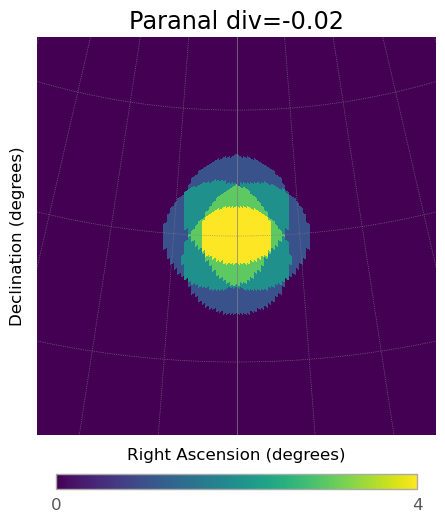

In [77]:
array_LST.divergent_pointing(div=-0.02, az=0, alt=60)
array_LST.multiplicity_plot()

the azimuth of tel 1 is-3.141592653589793
It was negative and the az_tel_1 is: -6.283185307179586
The azimuth is None
the azimuth of tel 1 is-3.141592653589793
It was negative and the az_tel_1 is: -6.283185307179586
The azimuth is None
the azimuth of tel_2 is0.01858975931897412
the azimuth of tel_2 is-0.01858975931897412


2it [00:00,  6.27it/s]
2it [00:00,  7.50it/s]
2it [00:00,  6.61it/s]


6.478964288643721


2it [00:00,  7.42it/s]


The length of 1: 3145728, Length of 2: 3145728
Expected size: 3145728
The second map is


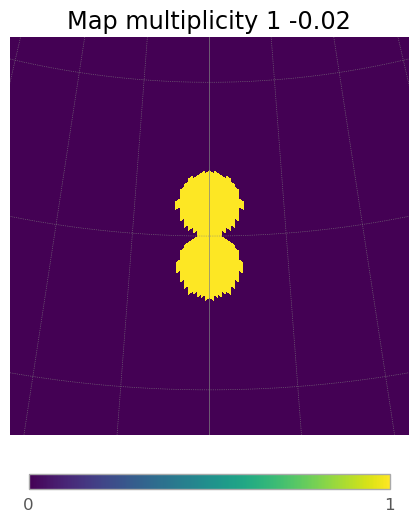

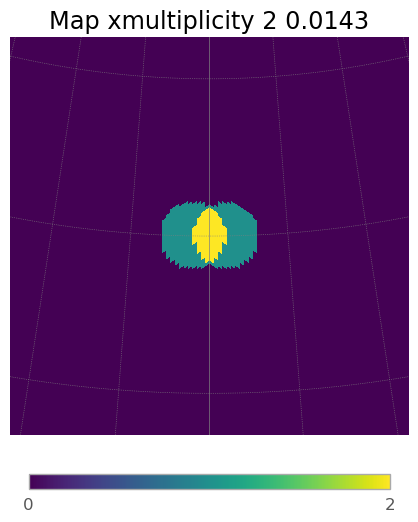

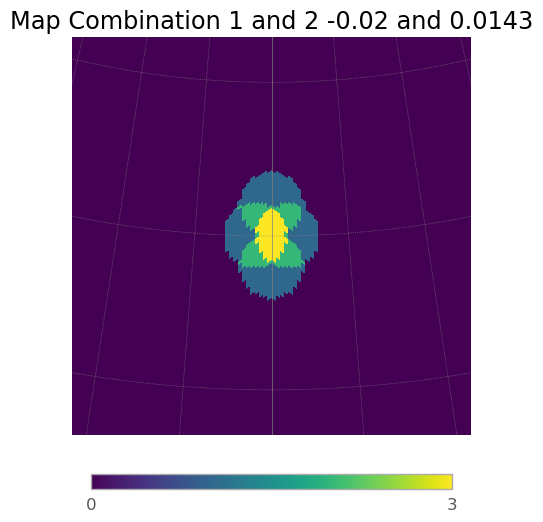

In [76]:
array_division_1.divergent_pointing_2_div(tel_group_2=array_division_2, div1=-0.02, div2=0.0143, az=0, alt=60)
array_division_1.multiplicity_plot_2_div(array_division_2)

In [71]:
array_division_1.divergent_pointing_2_div(tel_group_2=array_division_2, div1=-0.02, div2= 0.0143, az=0, alt=60)

the azimuth of tel 1 is3.128845746204468
It was negative and the az_tel_1 is: -0.012746907385325024
The azimuth is None
the azimuth of tel 1 is-3.128325417924252
It was negative and the az_tel_1 is: -6.269918071514045
The azimuth is None
the azimuth of tel_2 is-0.009164622748029972
the azimuth of tel_2 is0.009430545523923925


In [73]:
array_division_2.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-20.0,65.0,31.0,359.475,59.641,30.359,28.000,1.051,3.472,0.505,0.005,0.863,59.64
2,-120.0,0.0,33.0,0.540,60.359,29.641,28.000,1.051,3.472,0.495,-0.005,0.869,59.64


the azimuth of tel 1 is3.128845746204468
It was negative and the az_tel_1 is: -0.012746907385325024
the azimuth of tel 1 is-3.128325417924252
It was negative and the az_tel_1 is: -6.269918071514045
the azimuth of tel_2 is-0.009164622748029972
the azimuth of tel_2 is0.009430545523923925
The azimuth of tel 1 is -3.128325417924252
The azimuth of tel 2 is 0.009430545523923925


2it [00:00,  6.84it/s]
2it [00:00,  6.84it/s]
2it [00:00,  6.26it/s]


6.376638688105034


2it [00:00,  6.75it/s]


The length of 1: 3145728, Length of 2: 3145728
Expected size: 3145728
The second map is


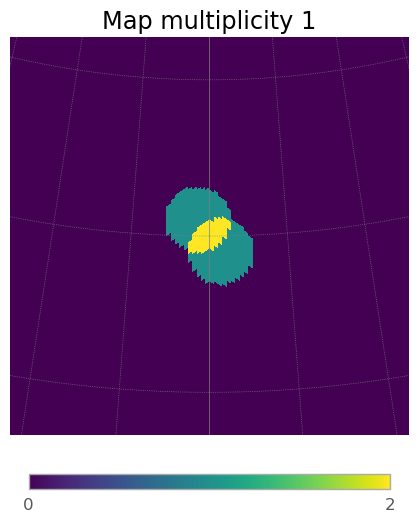

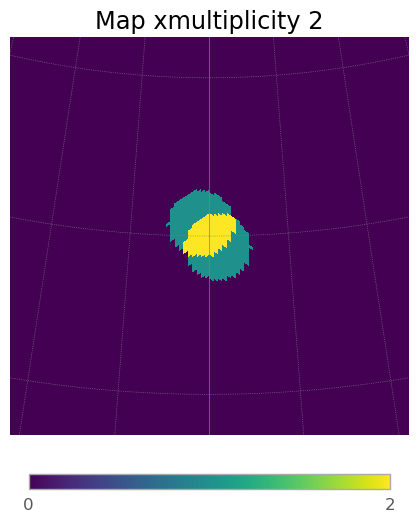

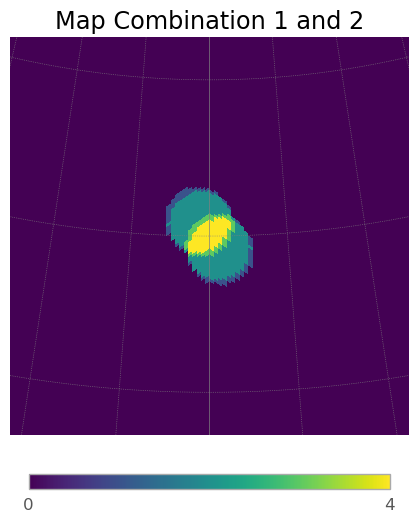

In [70]:
array_division_1.divergent_pointing_2_div(tel_group_2=array_division_2, div1=-0.02, div2= 0.0143, az=0, alt=60)
array_division_1.multiplicity_plot_2_div(array_division_2)

-0.059291833230166624
-6.210685880073812


2it [00:00,  6.18it/s]
2it [00:00,  6.72it/s]
2it [00:00,  5.83it/s]


6.494407144179804


2it [00:00,  6.82it/s]


The length of 1: 3145728, Length of 2: 3145728
Expected size: 3145728
The second map is


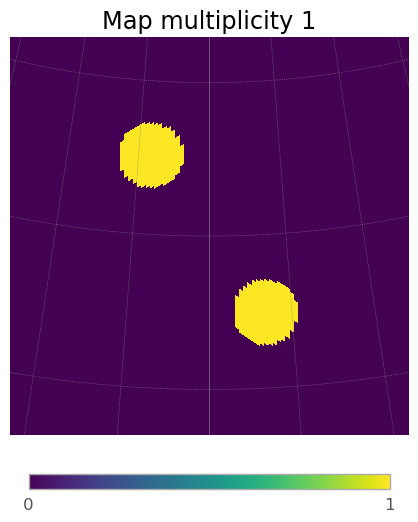

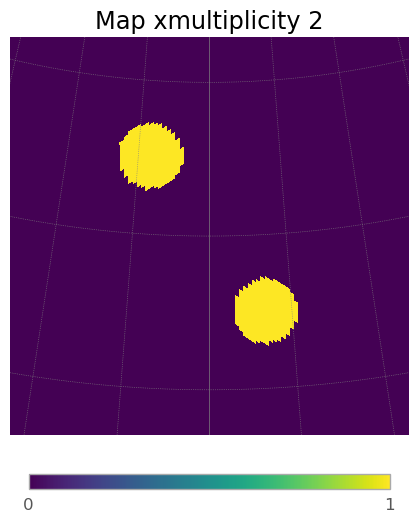

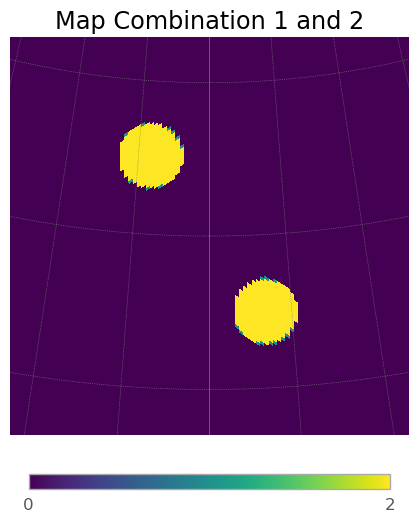

In [46]:
array_division_1.divergent_pointing_2_div(tel_group_2=array_division_2, div1=-0.1, div2=0.1, az=0, alt=60)
array_division_1.multiplicity_plot_2_div(array_division_2)

2it [00:00,  6.75it/s]
2it [00:00,  6.15it/s]


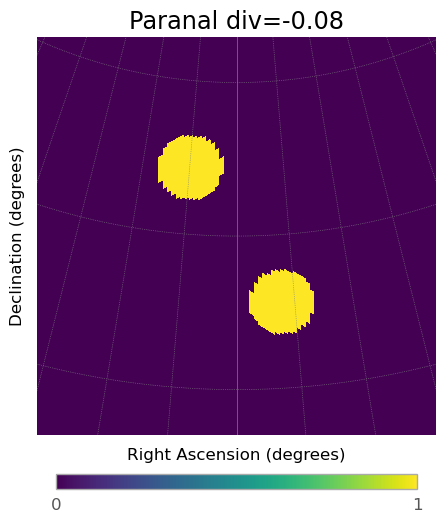

2it [00:00,  6.74it/s]
2it [00:00,  6.06it/s]


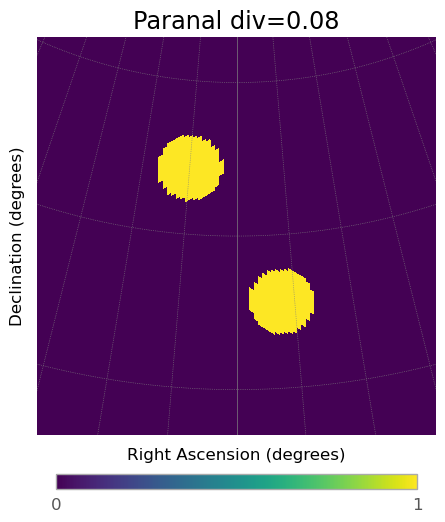

4it [00:00,  6.51it/s]
4it [00:00,  6.56it/s]


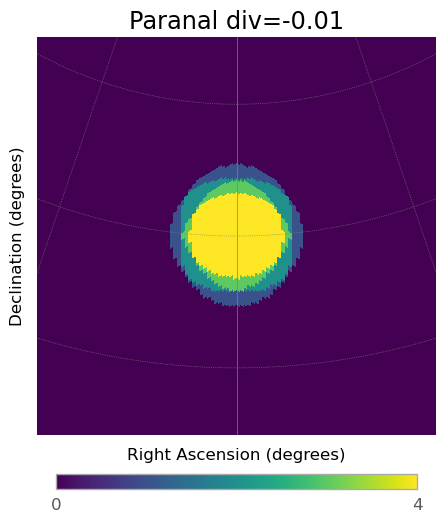

In [44]:
#array_SST.divergent_pointing(div=0.01, az=0, alt=70)
#array_SST.multiplicity_plot()
array_division_1.divergent_pointing(div=-0.08, az=0, alt=70)
array_division_1.multiplicity_plot()
array_division_2.divergent_pointing(div=0.08, az=0, alt=70)
array_division_2.multiplicity_plot()
array_LST.divergent_pointing(div=-0.01, az=0, alt=70)
array_LST.multiplicity_plot()

## SST multiple Divergences

In [25]:
print(type(array_SST))

<class 'divtel.array.Array'>


In [26]:
array_SST.table.units='deg'
array_SST.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,0.227,74.067,15.933,5.600,4.450,62.462,0.275,-0.001,0.962,736.12
2,-567.67,-341.0,46.42,6.782,73.041,16.959,5.600,4.450,62.462,0.290,-0.034,0.957,663.11
3,-344.67,-676.33,63.92,12.374,71.549,18.451,5.600,4.450,62.462,0.309,-0.068,0.949,758.95
4,-427.67,650.33,12.92,347.693,71.928,18.072,5.600,4.450,62.462,0.303,0.066,0.951,781.36
5,-125.0,92.25,21.38,358.360,70.663,19.337,5.600,4.450,62.462,0.331,0.009,0.944,158.43
6,-423.33,192.33,20.42,356.286,72.271,17.729,5.600,4.450,62.462,0.304,0.020,0.953,467.76
7,198.67,-232.0,40.75,3.638,68.932,21.068,5.600,4.450,62.462,0.359,-0.023,0.933,302.76
8,-9.67,57.33,39.25,359.002,70.079,19.921,5.600,4.450,62.462,0.341,0.006,0.940,61.25


In [78]:

table_SST_new = []
table_SST= array_SST.table
# Append the desired columns from the table to table_SST_new
table_SST_new.append(table_SST['x'])
table_SST_new.append(table_SST['y'])
table_SST_new.append(table_SST['z'])
#table_SST_new.append(table_SST['az'])
#table_SST_new.append(table_SST['alt'])
#table_SST_new.append(table_SST['zn'])
table_SST_new.append(table_SST['focal'])
table_SST_new.append(table_SST['radius'])
table_SST_new.append(table_SST['fov'])
#table_SST_new.append(table_SST['p_x'])
#table_SST_new.append(table_SST['p_y'])
#table_SST_new.append(table_SST['p_z'])
#table_SST_new.append(table_SST['d_tel'])



# Initialize sub_config and other variables
sub_config = []
telescopes = [1, 4, 7, 3]  # Telescope indices
new_sub_config = []

# Loop through the specified telescopes
for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config.append([col[tel - 1] for col in table_SST_new])


# Print the result for verification
print(sub_config)

[[-734.0, -12.67, 35.08, 5.6, 4.450000000000001, 62.46242685852285], [-427.67, 650.33, 12.92, 5.6, 4.450000000000001, 62.46242685852285], [198.67, -232.0, 40.75, 5.6, 4.450000000000001, 62.46242685852285], [-344.67, -676.33, 63.92, 5.6, 4.450000000000001, 62.46242685852285]]


In [79]:

table_SST_new_2 = []

# Append the desired columns from the table to table_SST_new
table_SST_new_2.append(table_SST['x'])
table_SST_new_2.append(table_SST['y'])
table_SST_new_2.append(table_SST['z'])
#table_SST_new.append(table_SST['az'])
#table_SST_new.append(table_SST['alt'])
#table_SST_new.append(table_SST['zn'])
table_SST_new_2.append(table_SST['focal'])
table_SST_new_2.append(table_SST['radius'])
table_SST_new_2.append(table_SST['fov'])
#table_SST_new.append(table_SST['p_x'])
#table_SST_new.append(table_SST['p_y'])
#table_SST_new.append(table_SST['p_z'])
#table_SST_new.append(table_SST['d_tel'])
sub_config_2=[]
telescopes=[2,8,9,10]

for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config_2.append([col[tel - 1] for col in table_SST_new_2])


print(sub_config_2)  # Verify

[[-567.67, -341.0, 46.42, 5.6, 4.450000000000001, 62.46242685852285], [-9.67, 57.33, 39.25, 5.6, 4.450000000000001, 62.46242685852285], [176.0, 501.33, 12.42, 5.6, 4.450000000000001, 62.46242685852285], [156.67, -624.33, 46.92, 5.6, 4.450000000000001, 62.46242685852285]]


In [80]:
# Define the file path where you want to save the output
output_file_path_3 = './SST_division_1.txt'

# Open the file in write mode
with open(output_file_path_3, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_3}")
# Define the file path where you want to save the output
output_file_path_4 = './SST_division_2.txt'

# Open the file in write mode
with open(output_file_path_4, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config_2:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_4}")

New telescope data has been written to ./SST_division_1.txt
New telescope data has been written to ./SST_division_2.txt


In [81]:
array_division_1= LoadConfig('./SST_division_1.txt', frame=cta, pointing2src=True)
array_division_2=LoadConfig('./SST_division_2.txt', frame=cta, pointing2src=True)

In [82]:
array_SST.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,359.854,66.128,23.872,5.600,4.450,62.462,0.405,0.001,0.914,736.12
2,-567.67,-341.0,46.42,355.144,66.883,23.117,5.600,4.450,62.462,0.391,0.033,0.920,663.11
3,-344.67,-676.33,63.92,349.851,67.769,22.231,5.600,4.450,62.462,0.372,0.067,0.926,758.95
4,-427.67,650.33,12.92,9.618,67.472,22.528,5.600,4.450,62.462,0.378,-0.064,0.924,781.36
5,-125.0,92.25,21.38,1.523,69.329,20.671,5.600,4.450,62.462,0.353,-0.009,0.936,158.43
6,-423.33,192.33,20.42,2.894,67.738,22.262,5.600,4.450,62.462,0.378,-0.019,0.925,467.76
7,198.67,-232.0,40.75,355.920,71.001,18.999,5.600,4.450,62.462,0.325,0.023,0.946,302.76
8,-9.67,57.33,39.25,0.991,69.916,20.084,5.600,4.450,62.462,0.343,-0.006,0.939,61.25


In [83]:
array_division_1.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,410.79
2,-427.67,650.33,12.92,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,725.47
3,198.67,-232.0,40.75,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,550.69
4,-344.67,-676.33,63.92,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,609.47


In [84]:
array_division_2.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-567.67,-341.0,46.42,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,560.29
2,-9.67,57.33,39.25,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,167.16
3,176.0,501.33,12.42,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,648.40
4,156.67,-624.33,46.92,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,566.34


In [85]:
array_division_1.table.units= "deg"
array_division_1.table
array_division_2.table.units='deg'
array_division_2.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-567.67,-341.0,46.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,560.29
2,-9.67,57.33,39.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,167.16
3,176.0,501.33,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,648.40
4,156.67,-624.33,46.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,566.34


In [86]:
array_division_1.table['fov']

62.462
62.462
62.462
62.462


In [87]:
array_SST.table.units = "deg"
array_SST.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,359.854,66.128,23.872,5.600,4.450,62.462,0.405,0.001,0.914,736.12
2,-567.67,-341.0,46.42,355.144,66.883,23.117,5.600,4.450,62.462,0.391,0.033,0.920,663.11
3,-344.67,-676.33,63.92,349.851,67.769,22.231,5.600,4.450,62.462,0.372,0.067,0.926,758.95
4,-427.67,650.33,12.92,9.618,67.472,22.528,5.600,4.450,62.462,0.378,-0.064,0.924,781.36
5,-125.0,92.25,21.38,1.523,69.329,20.671,5.600,4.450,62.462,0.353,-0.009,0.936,158.43
6,-423.33,192.33,20.42,2.894,67.738,22.262,5.600,4.450,62.462,0.378,-0.019,0.925,467.76
7,198.67,-232.0,40.75,355.920,71.001,18.999,5.600,4.450,62.462,0.325,0.023,0.946,302.76
8,-9.67,57.33,39.25,0.991,69.916,20.084,5.600,4.450,62.462,0.343,-0.006,0.939,61.25


In [88]:
#print(array_division_1)
#print(array_division_1.telescopes + array_division_2.telescopes)
array_together= array_division_1.telescopes + array_division_2.telescopes
#array_together
print(enumerate(array_together))

print(repr(map_multiplicity_2))

the azimuth of tel 1 is-3.127223149535432
It was negative and the az_tel_1 is: -6.268815803125225
The azimuth is None
the azimuth of tel 1 is-2.9404199632949197
It was negative and the az_tel_1 is: -6.082012616884713
The azimuth is None
the azimuth of tel 1 is3.0848783654166354
It was negative and the az_tel_1 is: -0.05671428817315771
The azimuth is None
the azimuth of tel 1 is2.9663577418235767
It was negative and the az_tel_1 is: -0.17523491176621642
The azimuth is None
the azimuth of tel_2 is0.08196123382162439
the azimuth of tel_2 is-0.04576845358261714
the azimuth of tel_2 is-0.1634094528252902
the azimuth of tel_2 is0.14269626139632224


4it [00:00,  7.32it/s]
4it [00:00,  7.23it/s]
4it [00:00,  6.69it/s]


12.104918008849975


4it [00:00,  7.35it/s]


The length of 1: 3145728, Length of 2: 3145728
Expected size: 3145728
The second map is


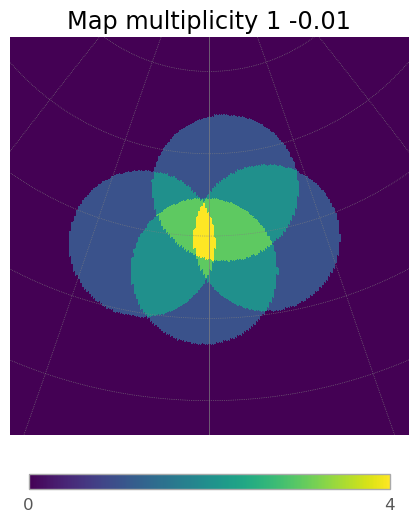

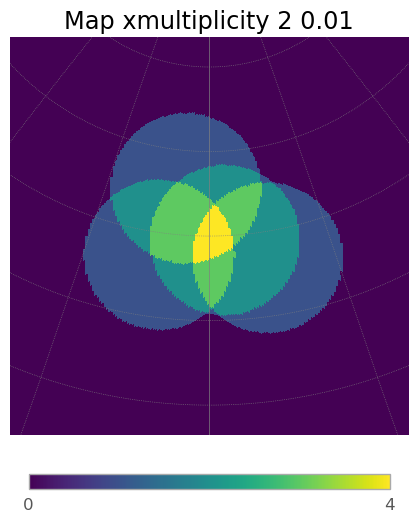

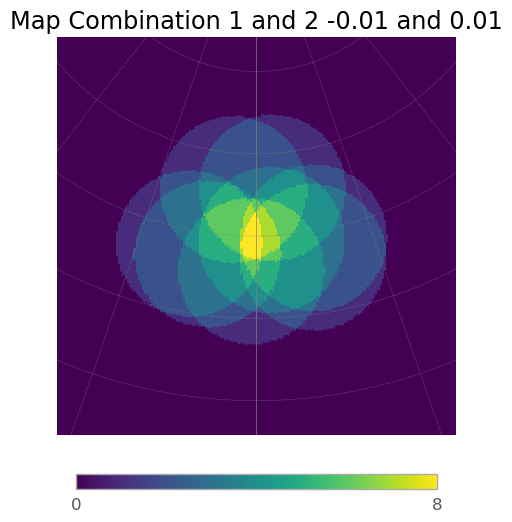

In [95]:
array_division_1.divergent_pointing_2_div(tel_group_2=array_division_2, div1=-0.01, div2=0.01, az=0, alt=70)

array_division_1.multiplicity_plot_2_div(array_division_2)

-0.005661844610671984 rad
-0.19576370542695543 rad
-0.42590957979999367 rad
-5.889193630991486 rad
-6.20886919908191 rad
-6.1596059105109795 rad
-0.2392038324265946 rad
-6.231651498578923 rad
-5.8026221698084015 rad
-0.5634856752721511 rad
-5.862300837514274 rad
-0.5317295345673783 rad
-5.822748732619822 rad
-6.169311658159765 rad
-0.451067167437325 rad


15it [00:02,  7.39it/s]
15it [00:02,  7.29it/s]


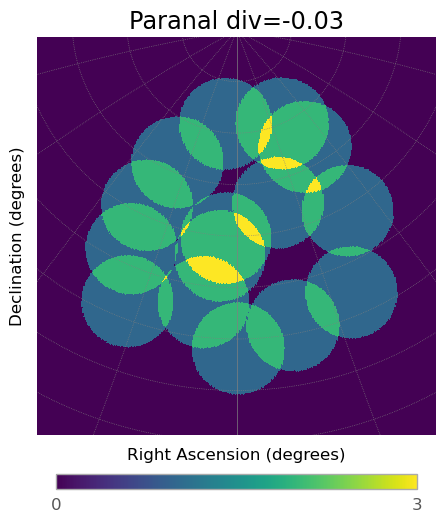

15it [00:02,  7.37it/s]
15it [00:02,  7.38it/s]


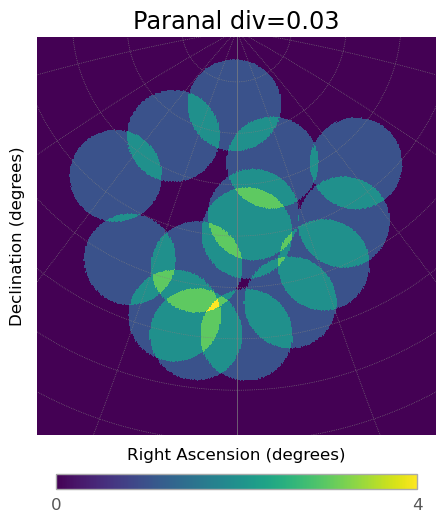

4it [00:00,  7.25it/s]
4it [00:00,  7.12it/s]


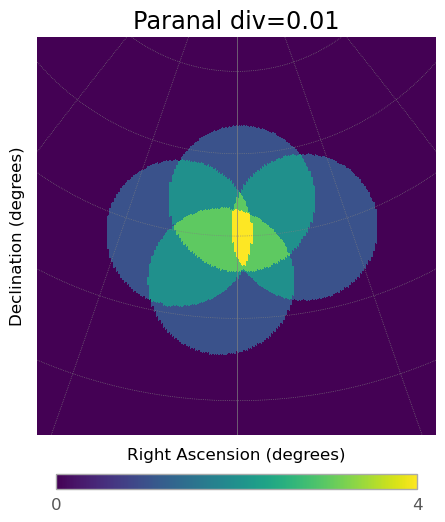

4it [00:00,  7.36it/s]
4it [00:00,  6.84it/s]


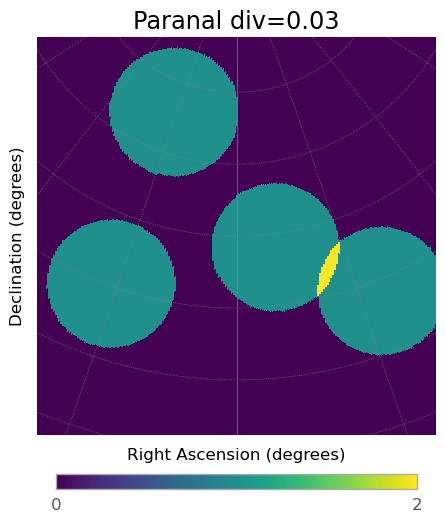

the azimuth of tel 1 is-3.127223149535432
It was negative and the az_tel_1 is: -6.268815803125225
The azimuth is None
the azimuth of tel 1 is-2.9404199632949197
It was negative and the az_tel_1 is: -6.082012616884713
The azimuth is None
the azimuth of tel 1 is3.0848783654166354
It was negative and the az_tel_1 is: -0.05671428817315771
The azimuth is None
the azimuth of tel 1 is2.9663577418235767
It was negative and the az_tel_1 is: -0.17523491176621642
The azimuth is None
the azimuth of tel_2 is0.3614521591384099
the azimuth of tel_2 is-0.13270878807654343
the azimuth of tel_2 is-0.4128260652454187
the azimuth of tel_2 is0.3675516833737641


4it [00:00,  7.34it/s]
4it [00:00,  7.33it/s]
4it [00:00,  6.82it/s]


12.104918008849975


4it [00:00,  7.12it/s]


The length of 1: 3145728, Length of 2: 3145728
Expected size: 3145728
The second map is


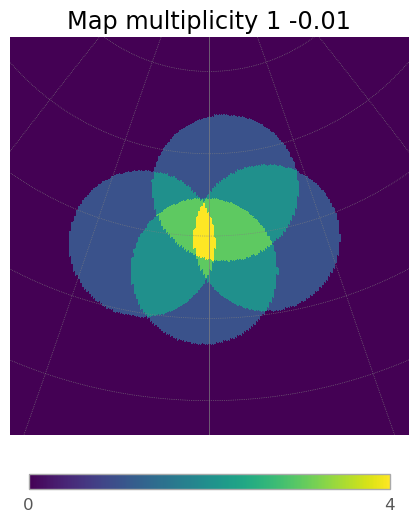

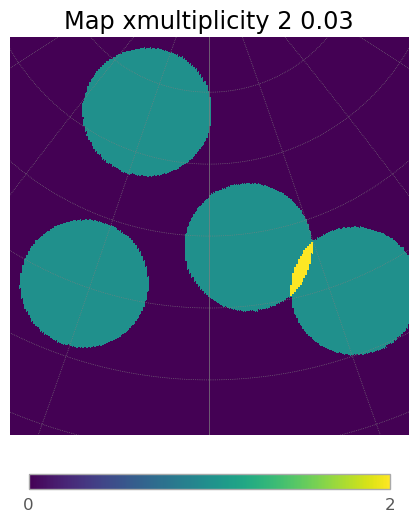

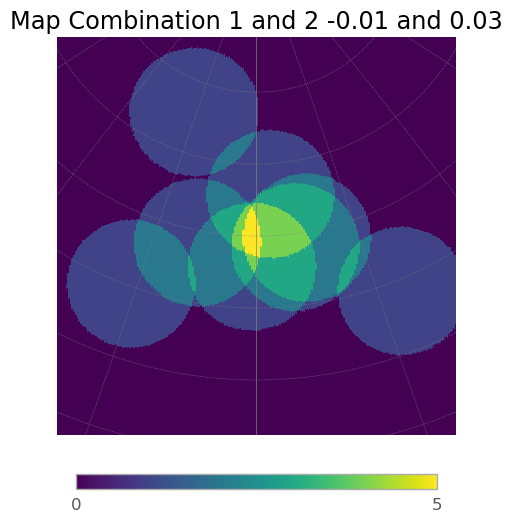

In [96]:
array_SST.divergent_pointing(div= -0.03, az=0, alt=70)
array_SST.multiplicity_plot()
array_SST.divergent_pointing(div= 0.03, az=0, alt=70)
array_SST.multiplicity_plot()
array_division_1.divergent_pointing(div= 0.01, az=0, alt=70)
array_division_1.multiplicity_plot()
array_division_2.divergent_pointing(div=0.03, az=0, alt=70)
array_division_2.multiplicity_plot()
array_division_1.divergent_pointing_2_div(tel_group_2=array_division_2, div1= -0.01, div2=0.03, az=0, alt=70)
array_division_1.multiplicity_plot_2_div(array_division_2)

In [91]:
array_SST.table.units = "rad"
array_SST.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,6.278,1.030,0.540,5.600,0.436,0.019,0.515,0.003,0.857,736.12
2,-567.67,-341.0,46.42,6.087,1.061,0.510,5.600,0.436,0.019,0.479,0.095,0.873,663.11
3,-344.67,-676.33,63.92,5.857,1.086,0.485,5.600,0.436,0.019,0.425,0.193,0.885,758.95
4,-427.67,650.33,12.92,0.394,1.076,0.495,5.600,0.436,0.019,0.439,-0.182,0.880,781.36
5,-125.0,92.25,21.38,0.074,1.186,0.384,5.600,0.436,0.019,0.374,-0.028,0.927,158.43
6,-423.33,192.33,20.42,0.124,1.105,0.465,5.600,0.436,0.019,0.445,-0.055,0.894,467.76
7,198.67,-232.0,40.75,6.044,1.269,0.302,5.600,0.436,0.019,0.289,0.070,0.955,302.76
8,-9.67,57.33,39.25,0.052,1.217,0.354,5.600,0.436,0.019,0.346,-0.018,0.938,61.25


In [92]:
array_division_1.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,0.823,67.844,22.156,5.600,4.450,62.462,0.377,-0.005,0.926,410.79
2,-427.67,650.33,12.92,11.526,69.124,20.876,5.600,4.450,62.462,0.349,-0.071,0.934,725.47
3,198.67,-232.0,40.75,356.751,72.849,17.151,5.600,4.450,62.462,0.294,0.017,0.956,550.69
4,-344.67,-676.33,63.92,349.960,69.566,20.434,5.600,4.450,62.462,0.344,0.061,0.937,609.47


-6.268815803125225 rad
-6.082012616884713 rad
-0.05671428817315771 rad
-0.17523491176621642 rad


4it [00:00,  7.35it/s]
4it [00:00,  6.91it/s]


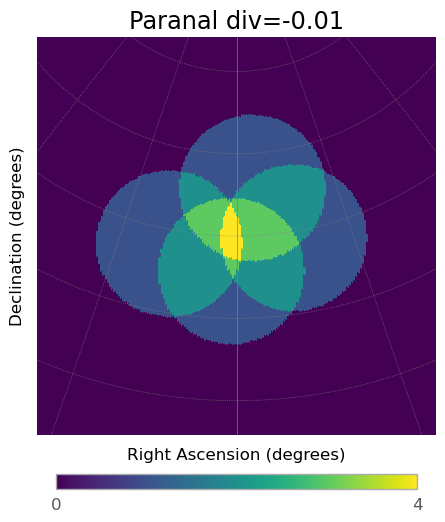

4it [00:00,  5.96it/s]
4it [00:00,  5.66it/s]


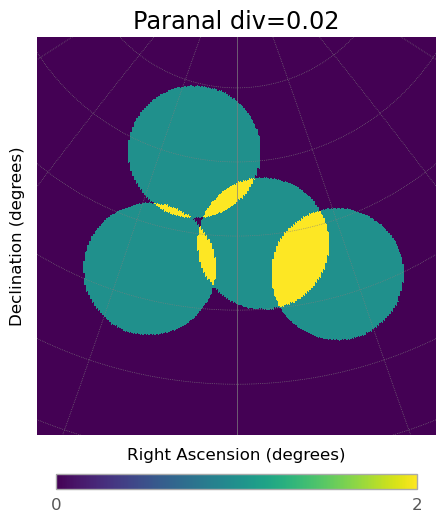

In [93]:
#array_SST.divergent_pointing_2_div(tel_group_1=array_division_1, tel_group_2=array_division_2, div1=-0.01, div2=0.02, az=0, alt=70)
#array_division.multiplicity_plot()
array_division_1.divergent_pointing(div=-0.01, az=0, alt=70)
array_division_1.multiplicity_plot()
array_division_2.divergent_pointing(div=0.02, az=0, alt=70)
array_division_2.multiplicity_plot()

In [52]:
array_SST

15it [00:02,  5.67it/s]
15it [00:02,  5.84it/s]


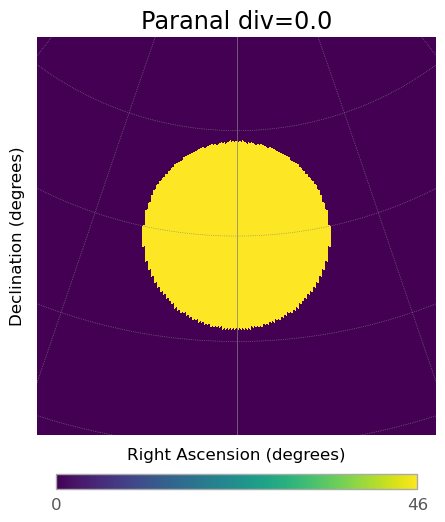

15it [00:02,  5.93it/s]
15it [00:02,  5.78it/s]


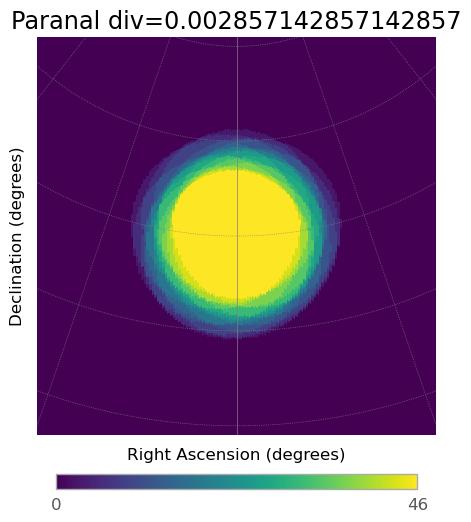

15it [00:02,  6.02it/s]
15it [00:02,  5.81it/s]


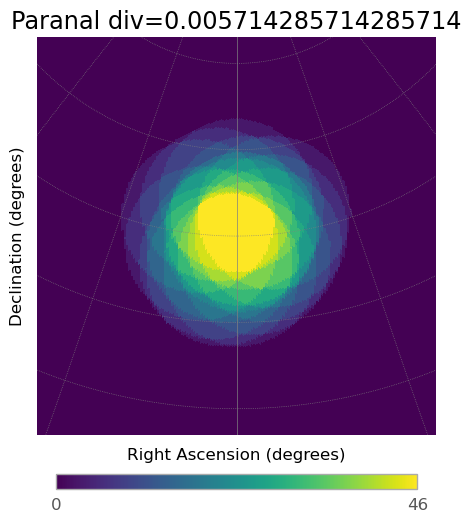

15it [00:02,  6.10it/s]
15it [00:02,  5.81it/s]


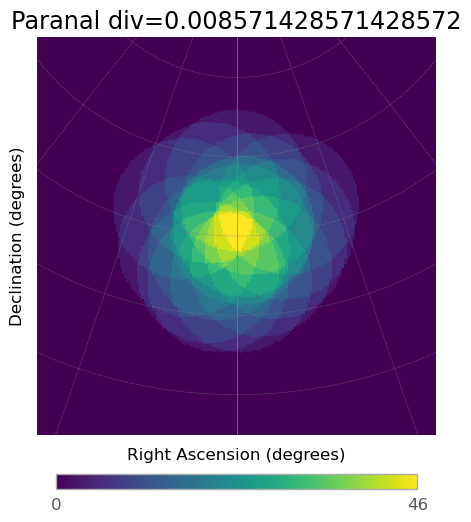

15it [00:02,  6.09it/s]
15it [00:02,  5.84it/s]


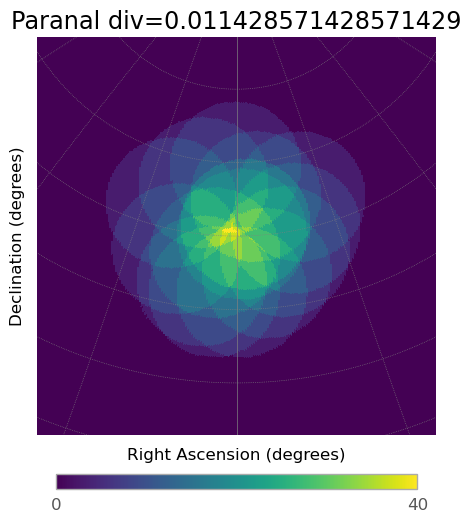

15it [00:02,  6.07it/s]
15it [00:02,  5.95it/s]


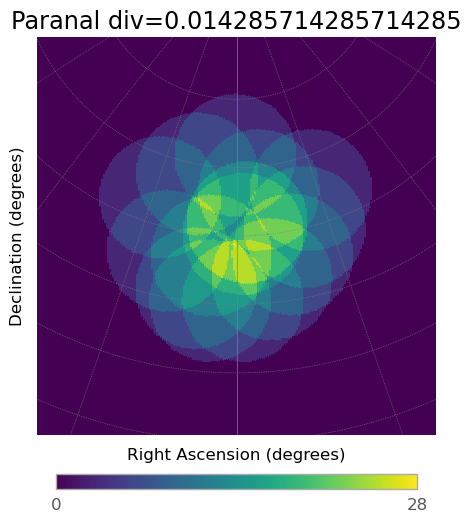

15it [00:02,  6.07it/s]
15it [00:02,  5.94it/s]


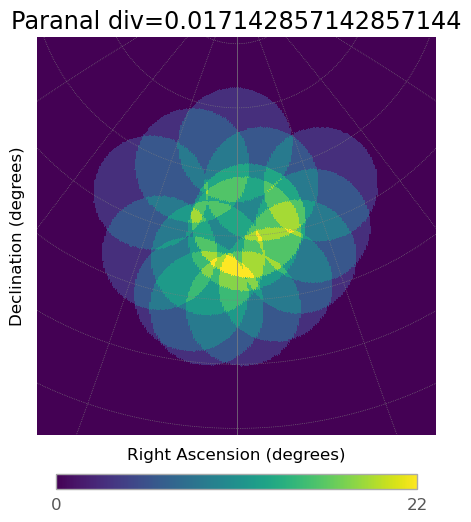

15it [00:02,  6.09it/s]
15it [00:02,  5.93it/s]


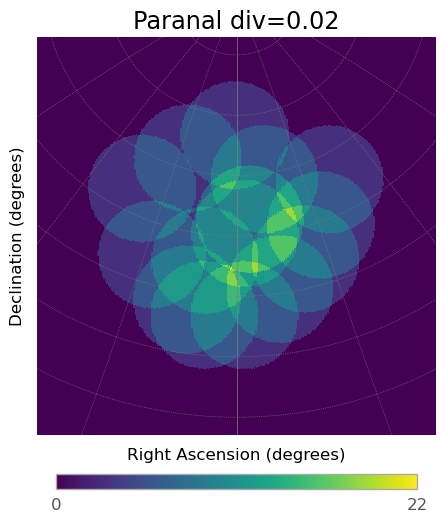

In [53]:
divergence=[]
divergence=np.linspace(0,0.03, 20)
for divergence in div:
    array_SST.divergent_pointing(div=divergence, az=0, alt=70)
    array_SST.multiplicity_plot(number_of_telescopes_subarray_1)
    

15it [00:02,  6.05it/s]
15it [00:02,  5.60it/s]


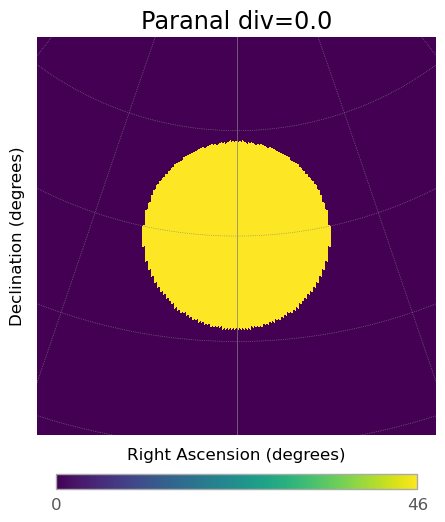

15it [00:02,  6.02it/s]
15it [00:02,  5.87it/s]


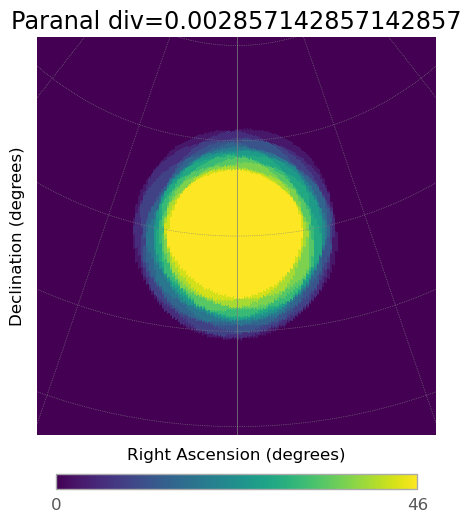

15it [00:02,  5.92it/s]
15it [00:02,  5.88it/s]


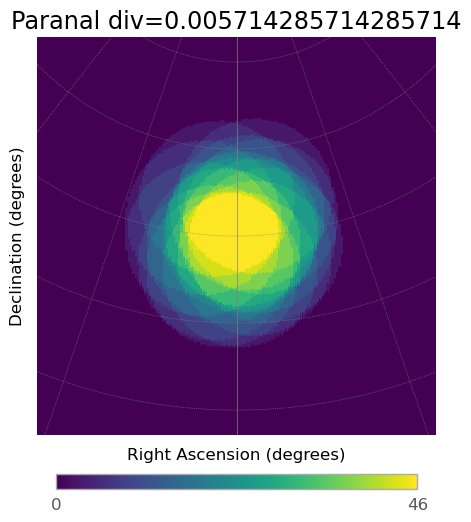

15it [00:02,  5.97it/s]
15it [00:02,  5.81it/s]


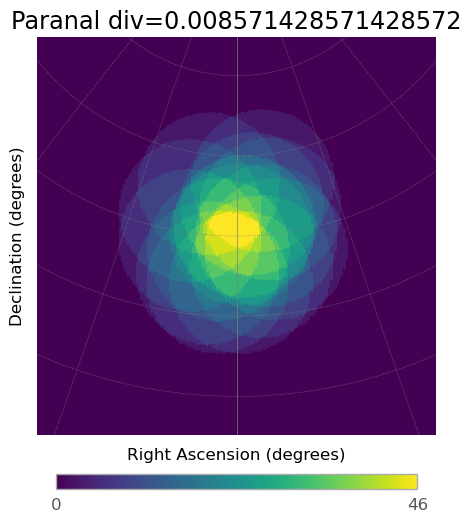

15it [00:02,  5.91it/s]
15it [00:02,  6.91it/s]


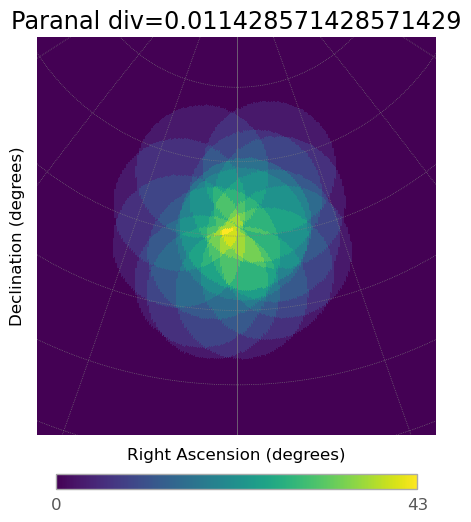

15it [00:02,  7.09it/s]
15it [00:02,  7.02it/s]


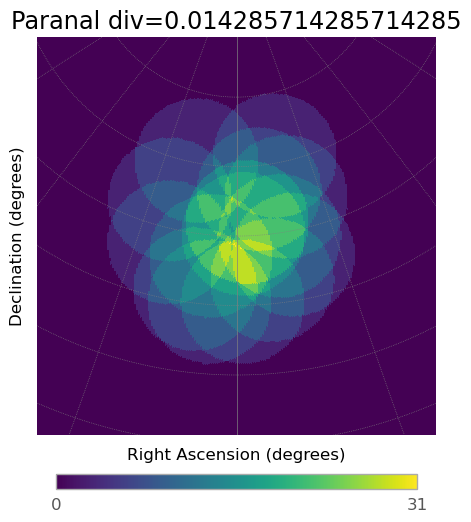

15it [00:02,  7.31it/s]
15it [00:02,  7.02it/s]


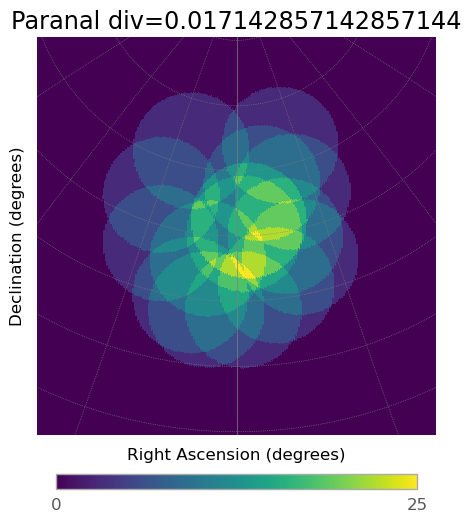

15it [00:02,  7.25it/s]
15it [00:02,  7.11it/s]


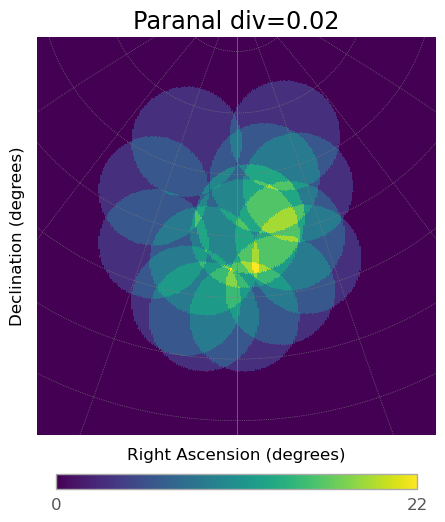

In [54]:
divergence=[]
divergence=np.linspace(0,0.03, 20)
for divergence in div:
    array_SST_2.divergent_pointing(div=divergence, az=0, alt=70)
    array_SST_2.multiplicity_plot(number_of_telescopes_subarray_2)
    

## Full Array

46it [00:06,  7.25it/s]
46it [00:06,  7.08it/s]


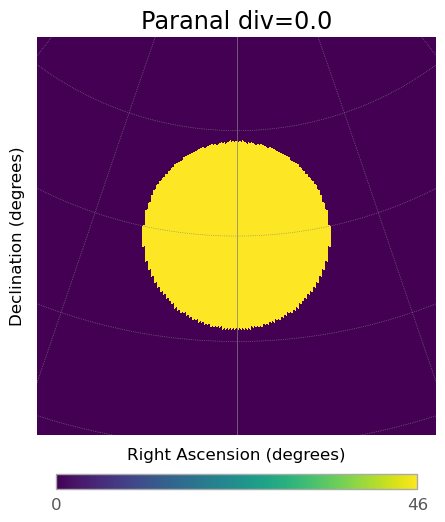

46it [00:06,  7.09it/s]
46it [00:06,  7.13it/s]


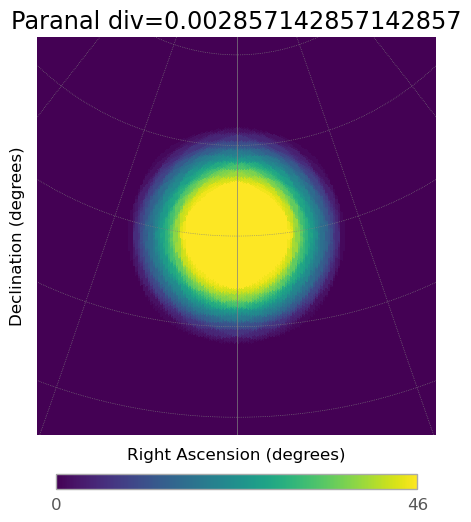

46it [00:06,  7.17it/s]
46it [00:06,  7.12it/s]


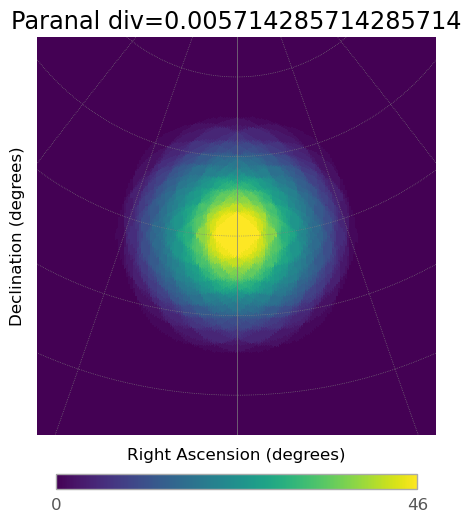

46it [00:06,  7.13it/s]
46it [00:06,  7.11it/s]


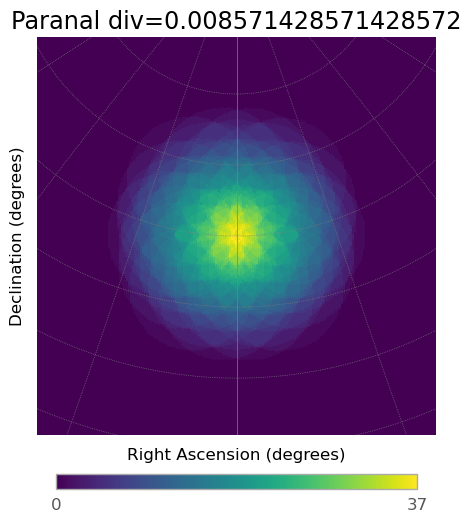

46it [00:06,  7.10it/s]
46it [00:06,  7.12it/s]


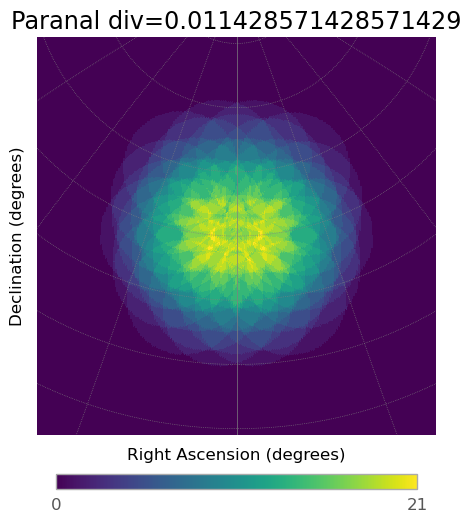

46it [00:06,  7.17it/s]
46it [00:06,  7.15it/s]


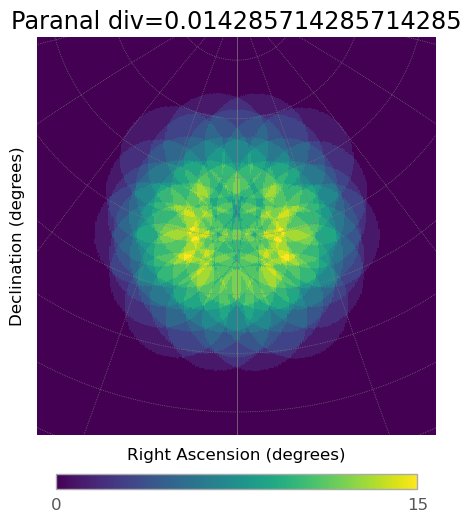

46it [00:06,  7.19it/s]
46it [00:06,  7.06it/s]


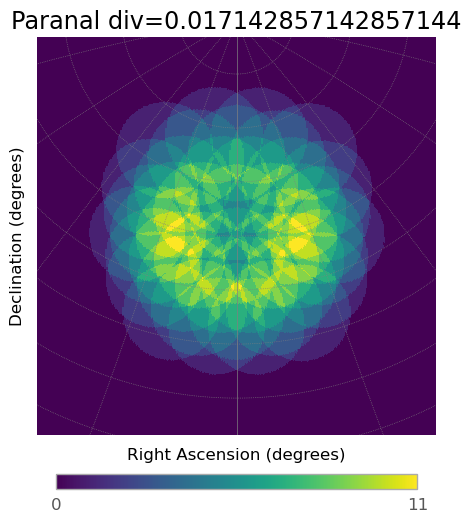

46it [00:06,  7.13it/s]
46it [00:06,  7.14it/s]


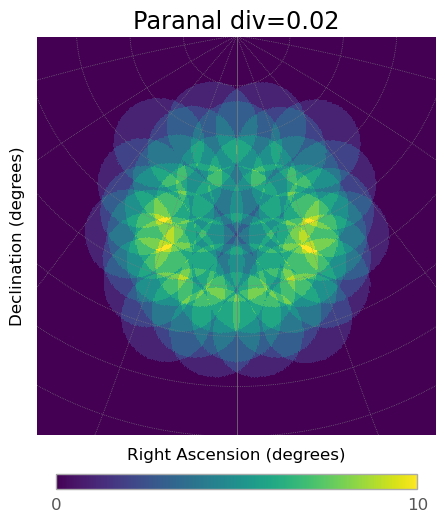

In [55]:
divergence=[]
divergence=np.linspace(0,0.03, 10)
for divergence in div:
    full_array_SST.divergent_pointing(div=divergence, az=0, alt=70)
    full_array_SST.multiplicity_plot()
    

{'barycenter': <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x128690a70>, 'SST': <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x128495ac0>}


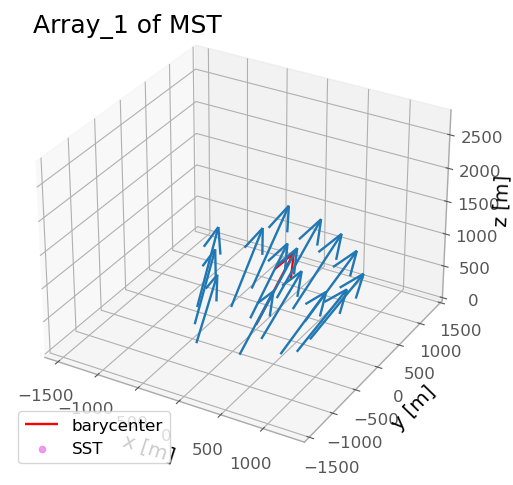

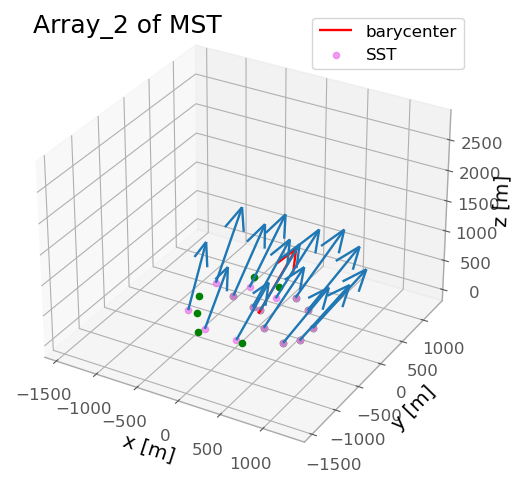

In [56]:
#array_alt_1.display("xyz")
#fig = plt.figure()
ax = array_SST.display("xyz")
#ax = array_division.display("xyz")
ax_2 = array_SST_2.display("xyz")

colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_SST.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_2 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_SST.table["fov"]
]
fov_labels_2 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_3 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_SST.table["fov"]
]
fov_labels_3 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}

#array_3.display("xyz",color=c,label=label)

for i in range(len(array_SST.table)):
    # Color each telescope point according to the FoV
    ax_2.scatter(array_SST.table['x'][i], array_SST.table['y'][i], array_SST.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]], alpha=1)

for i in range(len(array_SST_2.table)):
    # Color each telescope point according to the FoV
    ax_2.scatter(array_SST_2.table['x'][i], array_SST_2.table['y'][i], array_SST_2.table['z'][i], 
               color='violet', label=fov_labels[colors[i]], alpha=0.8)

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='lower left')
ax.text2D(0.05, 0.95, "Array_1 of MST ", 
          transform=ax.transAxes, fontsize=18)


#SECOND Configuration



#for i in range(len(array_SST_2.table)):
    # Color each telescope point according to the FoV
#    ax.scatter(array_SST_2.table['x'][i], array_SST_2.table['y'][i], array_SST_2.table['z'][i], 
#               color=colors_2[i], label=fov_labels_2[colors_2[i]])
   
# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
print(by_label)
ax_2.legend(by_label.values(), by_label.keys())
ax_2.text2D(0.05, 0.95, "Array_2 of MST", 
            transform=ax_2.transAxes, fontsize=18)




plt.legend(by_label.values(), by_label.keys())

plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 